In [2]:
load("skew.RData")
dim(dat)

[1] 1000    9

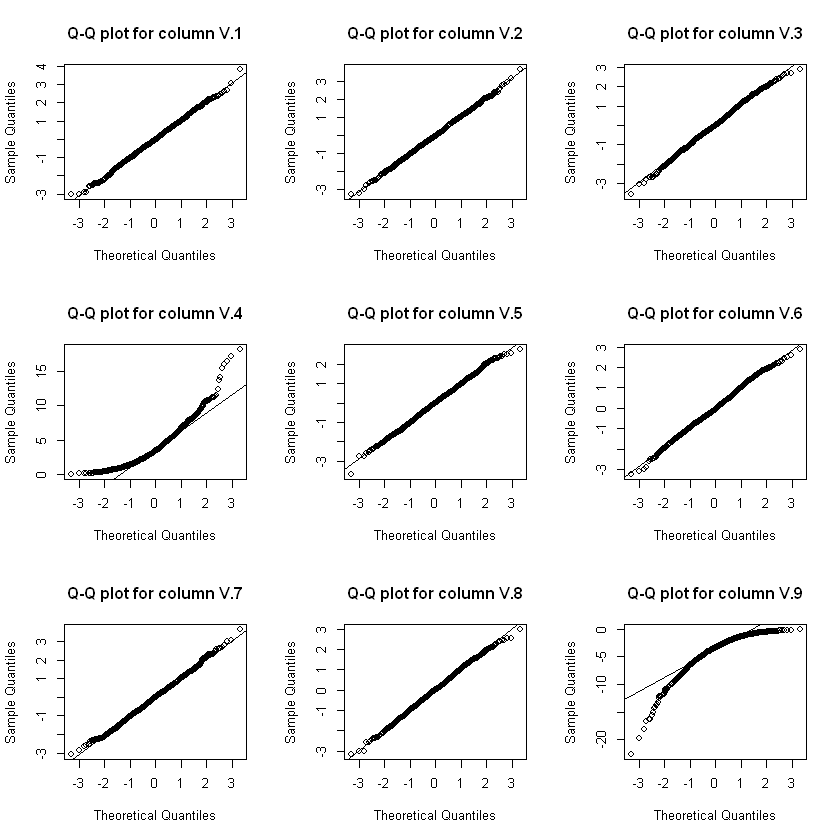

In [3]:
par(mfrow = c(3,3))
for (i in 1:9) {
  x <- dat[,i]
  qqnorm(x,  main=paste0("Q-Q plot for column V.",i,sep=""))
  qqline(x)
}

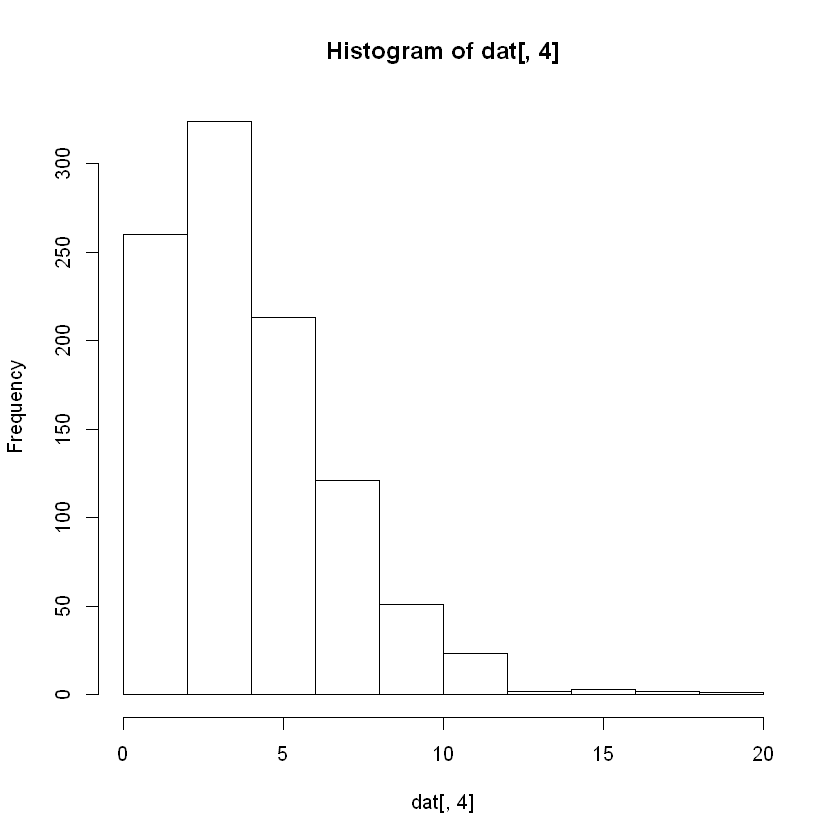

In [4]:
hist(dat[,4])

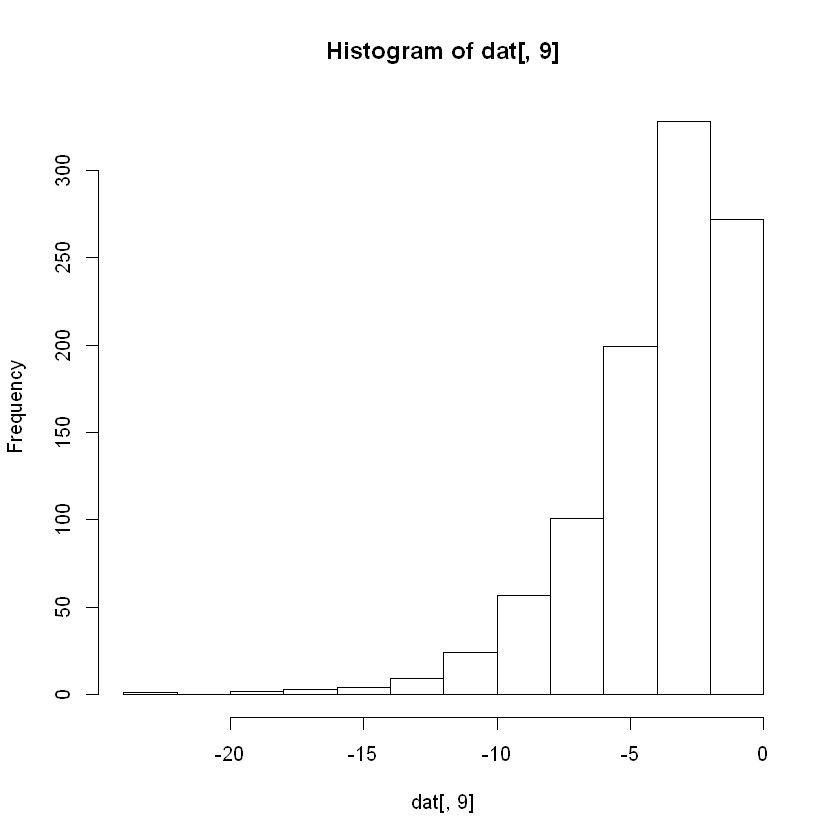

In [5]:
hist(dat[,9])

In [6]:
head(InsectSprays)

count,spray
10,A
7,A
20,A
14,A
14,A
12,A


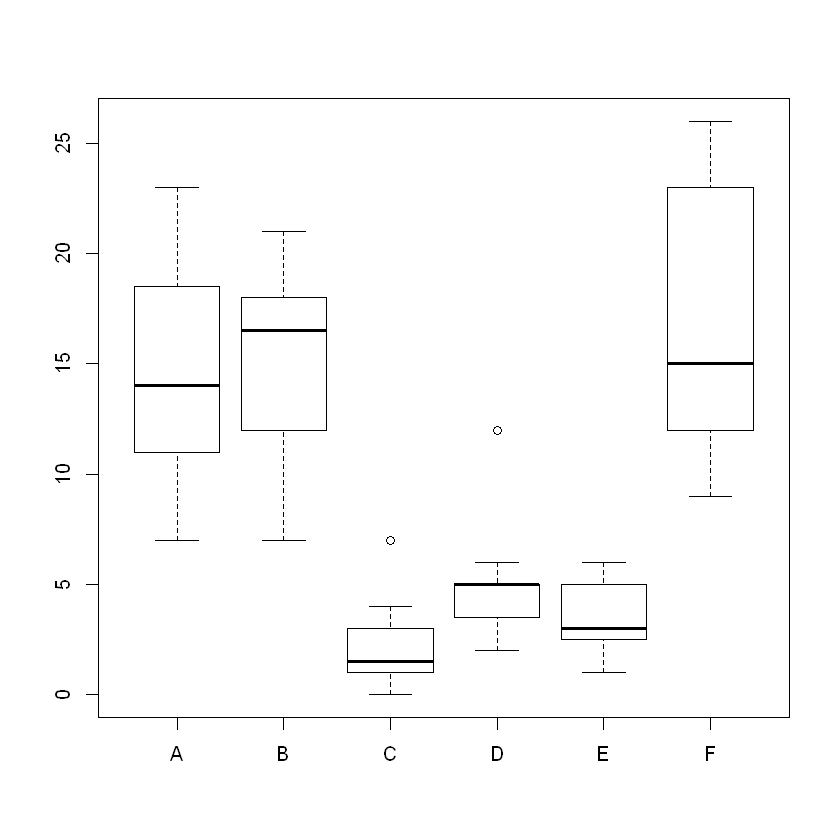

In [7]:
boxplot(InsectSprays$count ~ InsectSprays$spray)

In [13]:
library(dplyr)
data(nym.2002, package="UsingR")
head(nym.2002)

,place,gender,age,home,time
3475,3592,Male,52,GBR,217.4833
13594,13853,Female,40,NY,272.5500
12012,12256,Male,31,FRA,265.2833
10236,10457,Female,33,MI,256.1500
9476,9686,Male,33,NY,252.2500
1720,1784,Male,40,NJ,201.9667


In [12]:
install.packages("UsingR", repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/huynh/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependency 'HistData'



package 'HistData' successfully unpacked and MD5 sums checked
package 'UsingR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\huynh\AppData\Local\Temp\RtmpiEzpAN\downloaded_packages


In [14]:
males<-filter(nym.2002, gender=="Male") 
females<-filter(nym.2002, gender=="Female") 

Warning message:
"package 'bindrcpp' was built under R version 3.5.2"

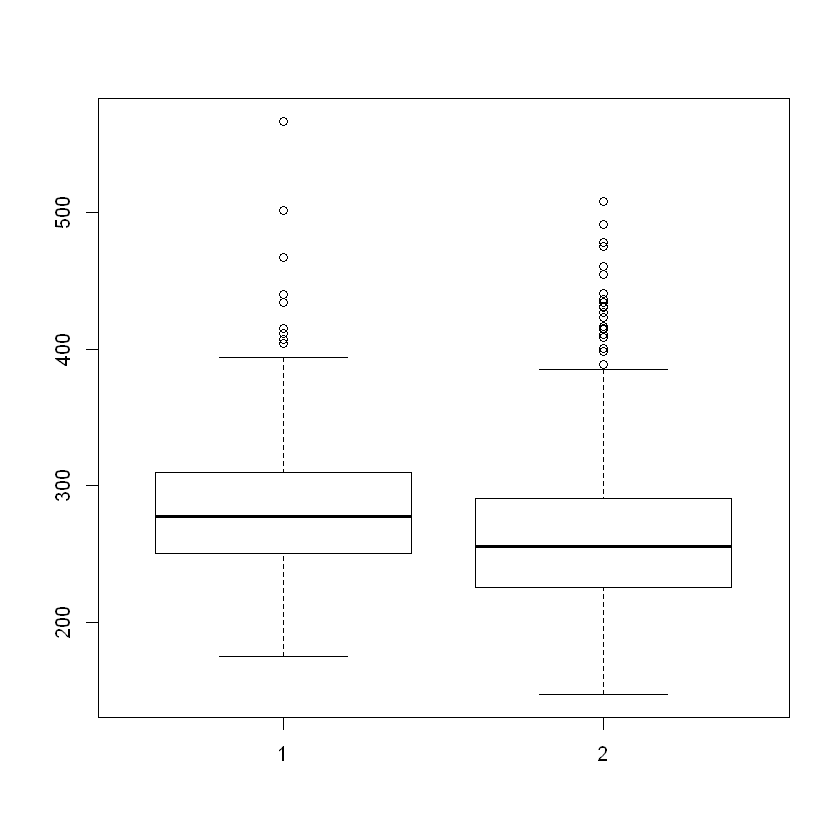

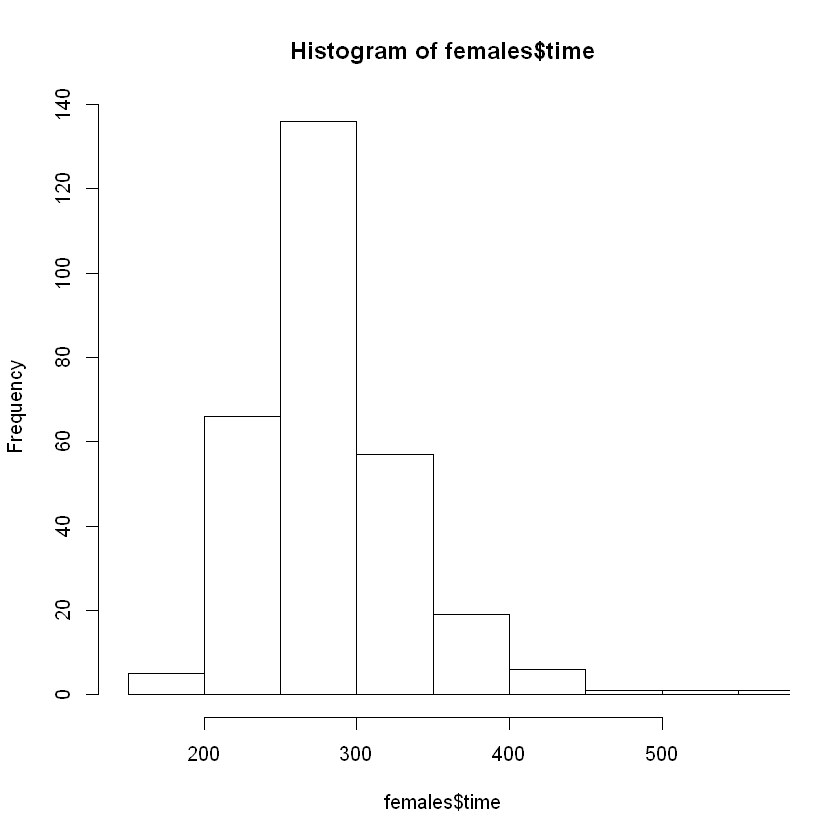

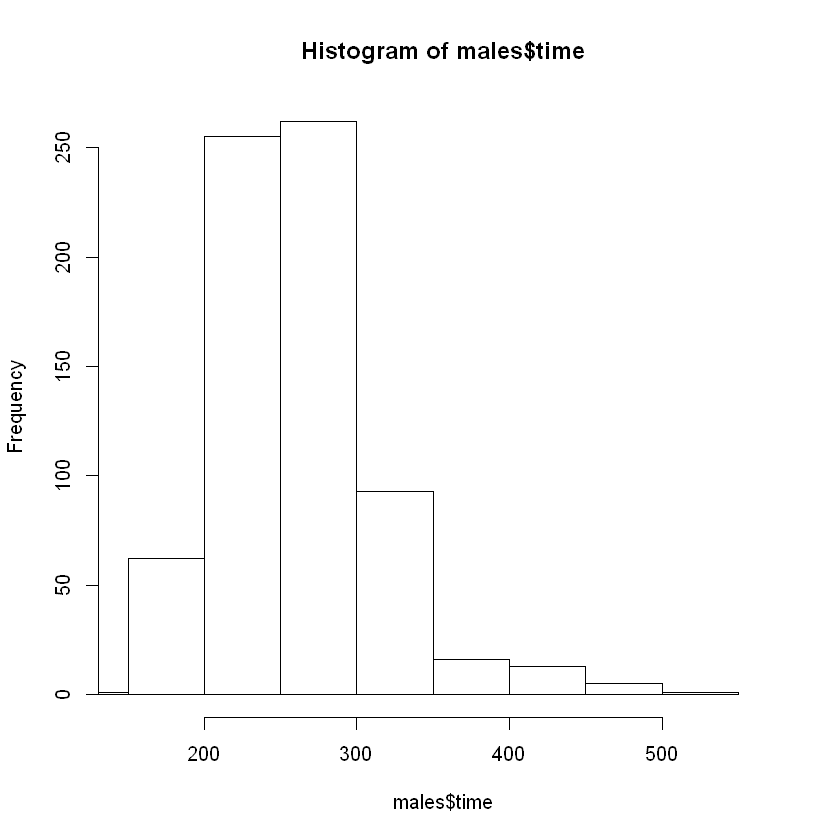

In [15]:
boxplot(females$time, males$time)
hist(females$time,xlim=c(range( nym.2002$time)))
hist(males$time,xlim=c(range( nym.2002$time)))

In [16]:
cor(males$age,males$time)

[1] 0.2432273

In [17]:
cor(females$age,females$time)

[1] 0.2443156

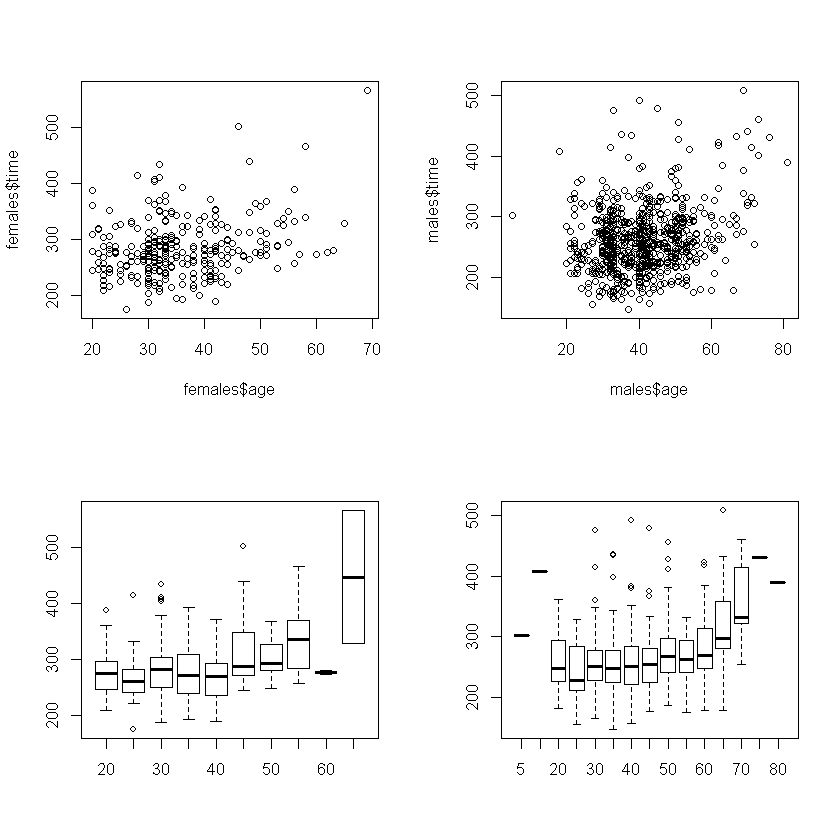

In [21]:
par(mfrow = c(2,2))
plot(females$age, females$time)
plot(males$age, males$time)
group <- floor(females$age/5) * 5
boxplot(females$time~group)
group <- floor(males$age/5) * 5
boxplot(males$time~group)

In [24]:
time = sort(nym.2002$time)
head(time)

[1] 147.3333 156.0000 157.5833 163.9333 164.5000 165.5167

In [25]:
min(time) / median(time)

[1] 0.5605402

In [26]:
max(time) / median(time)

[1] 2.156368

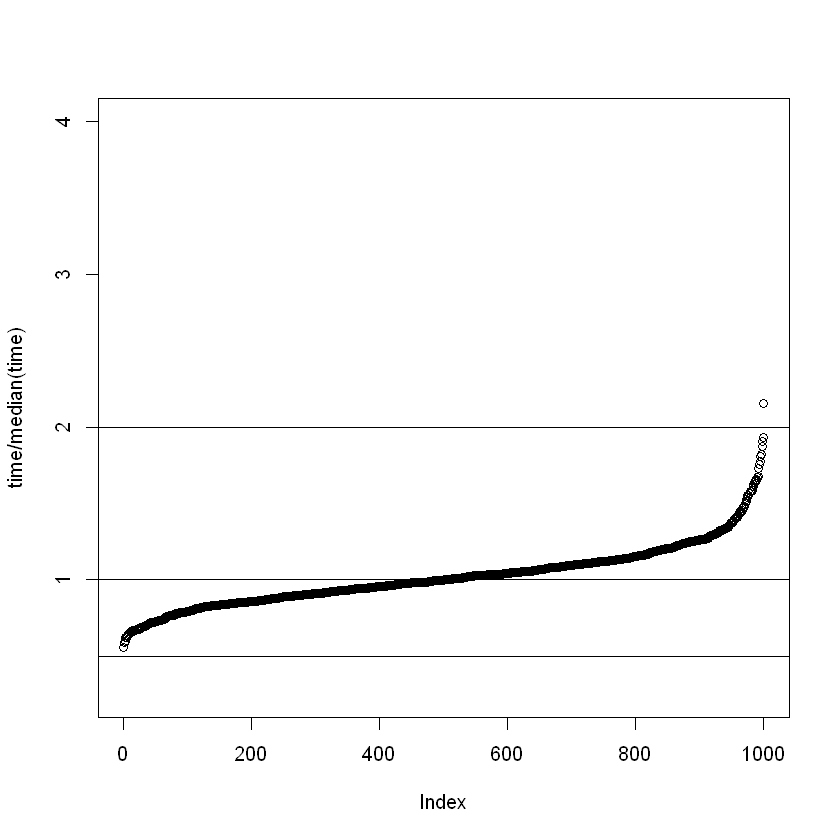

In [27]:
plot(time/median(time), ylim=c(1/4,4))
abline(h=c(1/2,1,2))

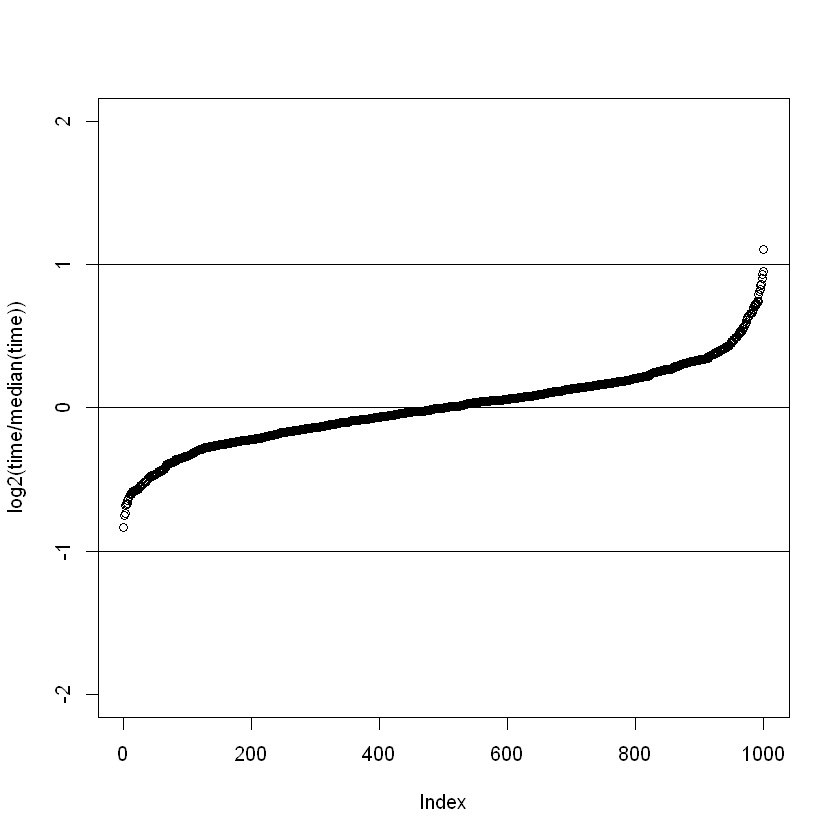

In [28]:
plot(log2(time/median(time)),ylim=c(-2,2))
abline(h=-1:1)

In [29]:
data(ChickWeight)
head(ChickWeight)



weight,Time,Chick,Diet
42,0,1,1
51,2,1,1
59,4,1,1
64,6,1,1
76,8,1,1
93,10,1,1


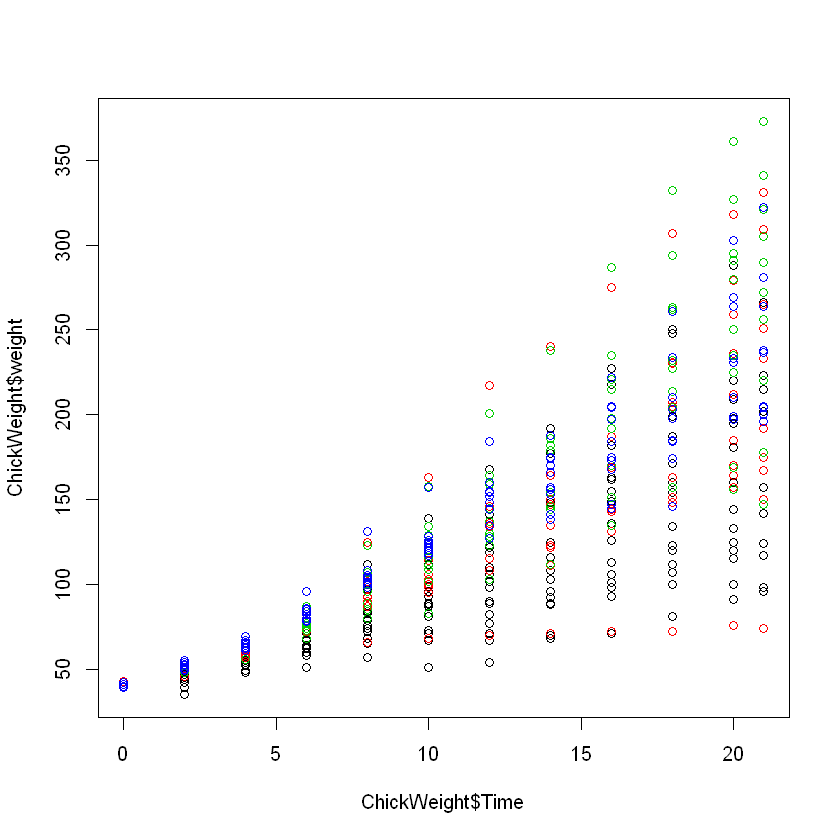

In [30]:
plot( ChickWeight$Time, ChickWeight$weight, col=ChickWeight$Diet)


In [31]:
chick = reshape(ChickWeight, idvar=c("Chick","Diet"), timevar="Time", direction="wide")

In [32]:
head(chick)


,Chick,Diet,weight.0,weight.2,weight.4,weight.6,weight.8,weight.10,weight.12,weight.14,weight.16,weight.18,weight.20,weight.21
1,1,1,42,51,59,64,76,93,106,125,149,171,199,205
13,2,1,40,49,58,72,84,103,122,138,162,187,209,215
25,3,1,43,39,55,67,84,99,115,138,163,187,198,202
37,4,1,42,49,56,67,74,87,102,108,136,154,160,157
49,5,1,41,42,48,60,79,106,141,164,197,199,220,223
61,6,1,41,49,59,74,97,124,141,148,155,160,160,157


In [33]:
chick = na.omit(chick)


In [35]:
mean(c(chick$weight.4, 3000))/mean(chick$weight.4)

[1] 2.062407

In [37]:
median(c(chick$weight.4, 3000))/median(chick$weight.4)

[1] 1

In [38]:
sd(c(chick$weight.4, 3000))/sd(chick$weight.4)

[1] 101.2859

In [39]:
mad(c(chick$weight.4, 3000))/mad(chick$weight.4)

[1] 1

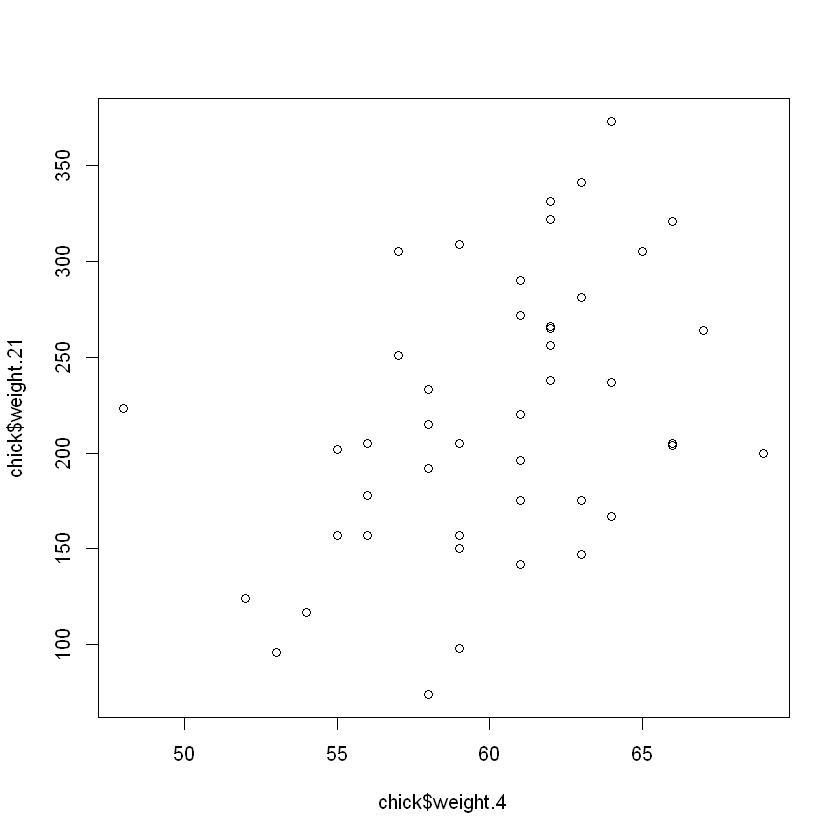

In [40]:
plot(chick$weight.4,chick$weight.21)

In [41]:
cor(c(chick$weight.4,3000),c(chick$weight.21,3000))/cor(chick$weight.4,chick$weight.21)

[1] 2.370719

In [42]:
x = chick$weight.4[chick$Diet == 1]
y = chick$weight.4[chick$Diet == 4]
t.test(c(x, 200), y)$p.value

[1] 0.9380347

In [44]:
x = chick$weight.4[chick$Diet == 1]
y = chick$weight.4[chick$Diet == 4]
wilcox.test(c(x, 200), y, exact=FALSE)$p.value

[1] 0.0009840921

Warning message:
"package 'rafalib' was built under R version 3.5.2"

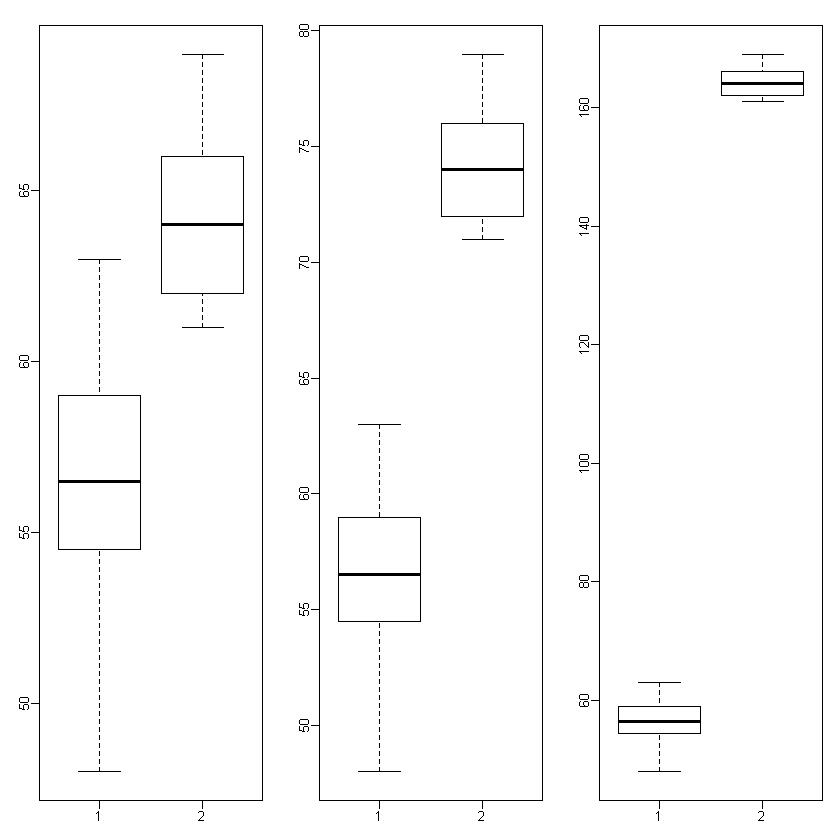

In [45]:
library(rafalib)
    mypar(1,3)
    boxplot(x,y)
    boxplot(x,y+10)
    boxplot(x,y+100)

In [46]:
t.test(x,y+10)$statistic - t.test(x,y+100)$statistic

t 
67.75097

In [47]:
wilcox.test(c(1,2,3),c(4,5,6))$p.value

[1] 0.1

In [48]:
wilcox.test(c(1,2,3),c(400,500,600))$p.value

[1] 0.1